# Imports

In [3]:
from scipy.stats import gamma
import scipy.stats as scst
import numpy as np
import matplotlib.pyplot as plt
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
import pandas as pd
import seaborn as sns

# Grab Data From Nasa Exoplanets Archive

In [2]:
query = NasaExoplanetArchive.query_criteria(table="ps", select="pl_orbeccen,pl_orbper,pl_masse")
ML_df = query.to_pandas()
len(ML_df)

38706

In [29]:
exoplanet_df_clean = ML_df.dropna(subset=['pl_orbeccen','pl_orbper','pl_masse']).copy()
# exoplanet_df_clean.head()

filter_exoplanet = exoplanet_df_clean[(exoplanet_df_clean['pl_orbper'] > 300) &  (exoplanet_df_clean['pl_masse'] > 100)]
filter_exoplanet

,pl_orbeccen,pl_orbper,pl_masse
77,0.510,1175.00000,4703.860424
281,0.100,2041.11539,1466.778098
312,0.362,5138.43727,2585.534091
640,0.773,74839.94555,7923.462187
715,0.159,921.53800,1204.257870
...,...,...,...
38366,0.000,3140.00000,1400.000000
38504,0.061,14723.57452,2346.527129
38637,0.650,2500.00000,6992.260000
38662,0.160,2690.00000,5085.254512


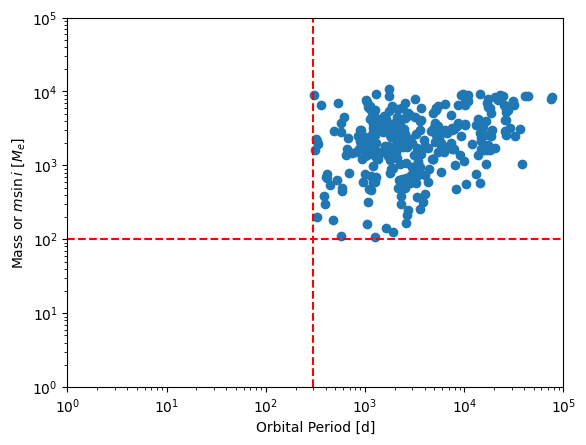

In [5]:
plt.scatter(filter_exoplanet["pl_orbper"], filter_exoplanet["pl_masse"])
plt.yscale("log")
plt.xscale("log")
plt.xlim(1,1e5)
plt.ylim(1,1e5)
plt.xlabel("Orbital Period [d]")
plt.ylabel(r"Mass or $m \sin i$ [$M_e$]")
plt.hlines(1e2, xmin = 1, xmax = 1e5, linestyles= "dashed", colors= "red")
plt.vlines(3e2, ymin = 1, ymax = 1e5, linestyles= "dashed", colors= "red")
plt.show()

# Make data

In [9]:
alpha = 0.867 # Shape (Alpha)
theta = 3.03 # Scale (Beta)

x = np.linspace(0, 1, 100)

pdf = gamma.pdf(x, a = alpha, scale = theta)
cdf = gamma.cdf(x, a = alpha, scale = theta)

# pdfz = np.log(scst.zscore(pdf))
# cdfz = np.log(scst.zscore(cdf))

# stats = (f'PDF : $\\ln Z$ = {pdfz} \n'
#          f'CDF : $\\ln Z$ = {cdfz} ')

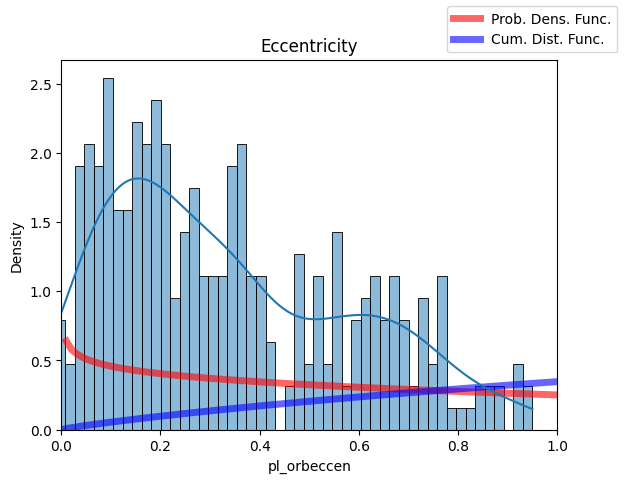

In [36]:
bbox = dict(boxstyle = "round", fc = "orange", ec = "grey", alpha = 0.5)

fig, axs = plt.subplots()

axs.plot(x, pdf, "r-", lw=5, alpha = 0.6, label = "Prob. Dens. Func.")
axs.plot(x, cdf, "b-", lw=5, alpha = 0.6, label = "Cum. Dist. Func.")
sns.histplot(x = filter_exoplanet["pl_orbeccen"], bins=50, kde=True,legend=True, stat = "density")
plt.xlim(0,1)
# axs.text(0.15, 0.5, stats, fontsize = 9, bbox = bbox)

fig.legend()
plt.title("Eccentricity")
plt.show()